201702986 김민규

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

import random
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torch.nn.functional as F
from torch.autograd import Variable

In [ ]:
#df = pd.read_csv('../input/googleplaystore.csv')
df = pd.read_csv('googleplaystore.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Cleaning Categories into integers
CategoryString = df["Category"]
categoryVal = df["Category"].unique()
categoryValCount = len(categoryVal)
category_dict = {}
for i in range(0,categoryValCount):
    category_dict[categoryVal[i]] = i
df["Category_c"] = df["Category"].map(category_dict).astype(int)

In [ ]:
#scaling and cleaning size of installation
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None

df["Size"] = df["Size"].map(change_size)

#filling Size which had NA
df.Size.fillna(method = 'ffill', inplace = True)

In [ ]:
#Cleaning no of installs classification
df['Installs'] = [int(i[:-1].replace(',','')) for i in df['Installs']]

In [ ]:
#Converting Type classification into binary
def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1

df['Type'] = df['Type'].map(type_cat)

In [ ]:
#Cleaning of content rating classification
RatingL = df['Content Rating'].unique()
RatingDict = {}
for i in range(len(RatingL)):
    RatingDict[RatingL[i]] = i
df['Content Rating'] = df['Content Rating'].map(RatingDict).astype(int)

In [ ]:
#dropping of unrelated and unnecessary items
df.drop(labels = ['Last Updated','Current Ver','Android Ver','App'], axis = 1, inplace = True)

In [ ]:
#Cleaning of genres
GenresL = df.Genres.unique()
GenresDict = {}
for i in range(len(GenresL)):
    GenresDict[GenresL[i]] = i
df['Genres_c'] = df['Genres'].map(GenresDict).astype(int)

In [ ]:
#Cleaning prices
def price_clean(price):
    if price == '0':
        return 0
    else:
        price = price[1:]
        price = float(price)
        return price

df['Price'] = df['Price'].map(price_clean).astype(float)

In [ ]:
# convert reviews to numeric
df['Reviews'] = df['Reviews'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9360 non-null   object 
 1   Rating          9360 non-null   float64
 2   Reviews         9360 non-null   int64  
 3   Size            9360 non-null   float64
 4   Installs        9360 non-null   int64  
 5   Type            9360 non-null   int64  
 6   Price           9360 non-null   float64
 7   Content Rating  9360 non-null   int64  
 8   Genres          9360 non-null   object 
 9   Category_c      9360 non-null   int64  
 10  Genres_c        9360 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 877.5+ KB


In [ ]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_c,Genres_c
0,ART_AND_DESIGN,4.1,159,19000000.0,10000,0,0.0,0,Art & Design,0,0
1,ART_AND_DESIGN,3.9,967,14000000.0,500000,0,0.0,0,Art & Design;Pretend Play,0,1
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000,0,0.0,0,Art & Design,0,0
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,0,0.0,1,Art & Design,0,0
4,ART_AND_DESIGN,4.3,967,2800000.0,100000,0,0.0,0,Art & Design;Creativity,0,2


In [ ]:
# for dummy variable encoding for Categories
df2 = pd.get_dummies(df, columns=['Category'])

In [ ]:
df2.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_c,Genres_c,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,159,19000000.0,10000,0,0.0,0,Art & Design,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14000000.0,500000,0,0.0,0,Art & Design;Pretend Play,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8700000.0,5000000,0,0.0,0,Art & Design,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25000000.0,50000000,0,0.0,1,Art & Design,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2800000.0,100000,0,0.0,0,Art & Design;Creativity,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


머신 러닝을 시작합니다.

In [ ]:
X = df.drop(labels = ['Category','Rating','Genres','Genres_c'],axis = 1)
y = df.Rating

In [ ]:
X.head()

,Reviews,Size,Installs,Type,Price,Content Rating,Category_c
0,159,19000000.0,10000,0,0.0,0,0
1,967,14000000.0,500000,0,0.0,0,0
2,87510,8700000.0,5000000,0,0.0,0,0
3,215644,25000000.0,50000000,0,0.0,1,0
4,967,2800000.0,100000,0,0.0,0,0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Reviews         9360 non-null   int64  
 1   Size            9360 non-null   float64
 2   Installs        9360 non-null   int64  
 3   Type            9360 non-null   int64  
 4   Price           9360 non-null   float64
 5   Content Rating  9360 non-null   int64  
 6   Category_c      9360 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 585.0 KB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6552, 7) (2808, 7) (6552,) (2808,)


In [ ]:
print(X.shape, y.shape)

(9360, 7) (9360,)


In [ ]:
#X_torch = torch.tensor(X.values)
#print(X_torch.shape)

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

X_train_torch = torch.tensor(X_train.values)
X_test_torch = torch.tensor(X_test.values)

y_train_torch = torch.tensor(y_train.values)
y_test_torch = torch.tensor(y_test.values)

print(X_train_torch.shape,X_test_torch.shape,y_train_torch.shape,y_test_torch.shape)


torch.Size([6552, 7]) torch.Size([2808, 7]) torch.Size([6552]) torch.Size([2808])


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6552 entries, 6776 to 3709
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Reviews         6552 non-null   float32
 1   Size            6552 non-null   float32
 2   Installs        6552 non-null   float32
 3   Type            6552 non-null   float32
 4   Price           6552 non-null   float32
 5   Content Rating  6552 non-null   float32
 6   Category_c      6552 non-null   float32
dtypes: float32(7)
memory usage: 230.3 KB


In [ ]:
X_train.head(20)

,Reviews,Size,Installs,Type,Price,Content Rating,Category_c
6776,641219.0,2700000.0,10000000.0,0.0,0.0,0.0,30.0
7636,8.0,18000000.0,1000.0,0.0,0.0,0.0,21.0
3482,1488396.0,7200000.0,100000000.0,0.0,0.0,0.0,27.0
3950,800.0,32000000.0,50000.0,0.0,0.0,0.0,11.0
9948,44.0,41000000.0,10000.0,0.0,0.0,0.0,25.0
2512,9.0,2900000.0,500.0,0.0,0.0,0.0,19.0
7765,117850.0,17000000.0,10000000.0,0.0,0.0,0.0,25.0
3494,41418.0,1200000.0,1000000.0,0.0,0.0,0.0,27.0
3724,293080.0,25000000.0,10000000.0,0.0,0.0,2.0,31.0
6702,1016.0,13000000.0,50000.0,0.0,0.0,1.0,30.0


In [ ]:
"""
class LinearRegressionModel(torch.nn.Module): 
  
    def __init__(self): 
        super(LinearRegressionModel, self).__init__() 
        self.linear = torch.nn.Linear(7, 1)  # One in and one out 
  
    def forward(self, x): 
        y_pred = self.linear(x) 
        return y_pred 
  
# our model 
our_model = LinearRegressionModel() 
  
criterion = torch.nn.MSELoss(size_average = False) 
optimizer = torch.optim.SGD(our_model.parameters(), lr = 0.01)
  
for epoch in range(100): 
  
    # Forward pass: Compute predicted y by passing  
    # x to the model 
    pred_y = our_model(X_train_torch)
  
    # Compute and print loss 
    loss = criterion(pred_y, y_train_torch)
  
    # Zero gradients, perform a backward pass,  
    # and update the weights. 
    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step()
    if epoch % 10 == 0 :
      print('epoch {}, loss {}'.format(epoch, loss.item())) 
"""

"\nclass LinearRegressionModel(torch.nn.Module): \n  \n    def __init__(self): \n        super(LinearRegressionModel, self).__init__() \n        self.linear = torch.nn.Linear(7, 1)  # One in and one out \n  \n    def forward(self, x): \n        y_pred = self.linear(x) \n        return y_pred \n  \n# our model \nour_model = LinearRegressionModel() \n  \ncriterion = torch.nn.MSELoss(size_average = False) \noptimizer = torch.optim.SGD(our_model.parameters(), lr = 0.01)\n  \nfor epoch in range(100): \n  \n    # Forward pass: Compute predicted y by passing  \n    # x to the model \n    pred_y = our_model(X_train_torch)\n  \n    # Compute and print loss \n    loss = criterion(pred_y, y_train_torch)\n  \n    # Zero gradients, perform a backward pass,  \n    # and update the weights. \n    optimizer.zero_grad() \n    loss.backward() \n    optimizer.step()\n    if epoch % 10 == 0 :\n      print('epoch {}, loss {}'.format(epoch, loss.item())) \n"

In [ ]:
input_size = 7
output_size = 1
num_epochs = 300
learning_rate = 0.002

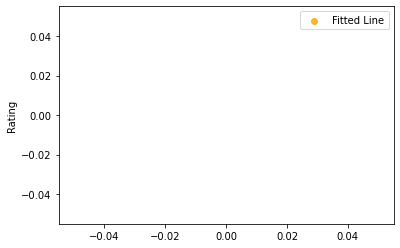

epoch 69, loss nan
[[nan]
 [nan]
 [nan]
 ...
 [nan]
 [nan]
 [nan]]


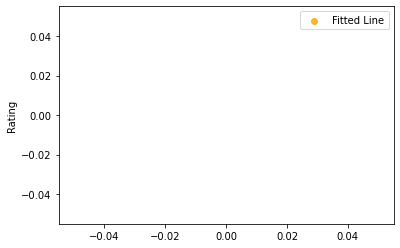

epoch 74, loss nan
[[nan]
 [nan]
 [nan]
 ...
 [nan]
 [nan]
 [nan]]


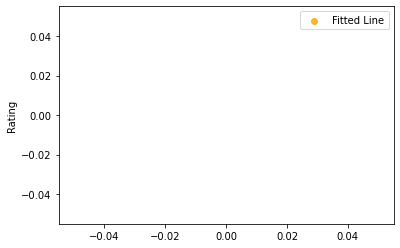

epoch 79, loss nan
[[nan]
 [nan]
 [nan]
 ...
 [nan]
 [nan]
 [nan]]


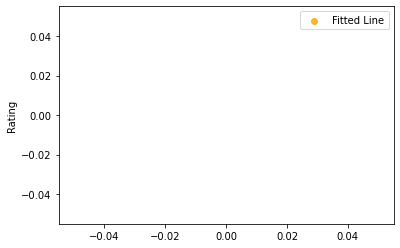

epoch 84, loss nan
[[nan]
 [nan]
 [nan]
 ...
 [nan]
 [nan]
 [nan]]


KeyboardInterrupt: ignored

In [ ]:
class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        super(LinearRegression,self).__init__()
        self.linear = nn.Linear(input_size,output_size)

    def forward(self,x):
        out = self.linear(x) #Forward propogation 
        return out

model = LinearRegression(input_size,output_size)

#Lost and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

#train the Model
for epoch in range(num_epochs):
    #convert numpy array to torch Variable
    #inputs = Variable(torch.from_numpy(X_train)) #convert numpy array to torch tensor
    inputs = X_train_torch
    #inputs = Variable(torch.Tensor(x_train))    
    #targets = Variable(torch.from_numpy(y_train)) #convert numpy array to torch tensor
    targets = y_train_torch

    #forward+ backward + optimize
    optimizer.zero_grad() #gradient
    outputs = model(inputs) #output
    loss = criterion(outputs,targets) #loss function
    loss.backward() #backward propogation
    optimizer.step() #1-step optimization(gradeint descent)

    if(epoch+1) %5 ==0:
        #print('epoch [%d/%d], Loss: %.4f' % (epoch +1, num_epochs, loss.data[0]))
        print('epoch {}, loss {}'.format(epoch, loss.item())) 
        predicted = model(X_train_torch).data.numpy()
        print(predicted)

        #plt.plot(X_train,y_train,'ro',label='Original Data')
        #plt.plot(X_train,predicted,label='Fitted Line')

        #sns.regplot(X_train,y_train,color='teal', label='Original Data', marker = 'x')
        sns.regplot(predicted,y_train,color='orange',label='Fitted Line')


        plt.legend()
        plt.show()

In [ ]:
print(201702986)